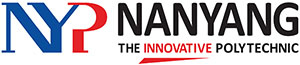

# Practical: MP (McCulloch and Pitts) Neuron and Perceptron



## Objectives

- Understand the fundamental concept of a neural network
- Understand working of Perceptron
- Implement Perceptron using Numpy
- Demonstrate the use of Perceptron for classification tasks



## Introduction

In this practical, we aim to examine some fundamental concepts of an Artificial Neural Network (ANN). As ANN fundamentally consists of a network of neuron units, we will first look at the basic concept of the McCulloch and Pitts (MP) neuron. Do note that in a MP neuron, the weights are fixed manually and there is actually _no learning_ involved.

Subsequently we will implement a Perceptron. It is an improvement over the MP Neuron as the weights are modified automatically through an iterative process thus facilitating some sort of learning.

## MP Neuron

We will first implement a MP neuron and set the weights so that it can be used to perform the Boolean operations (```AND```, ```OR``` etc.) on two Boolean inputs. We will start with the ```AND``` operation.

The following table shows the two inputs ($x_1$, $x_2$) and the outcome for an ```AND``` operation:

|$x_1$|$x_2$| AND |
|-------|-------|-----|
|   0   |   0   |  0  |
|   1   |   0   |  0  |
|   0   |   1   |  0  |
|   1   |   1   |  1  |



Enter the following codes to implement an MP neuron.

Do read the comments to understand the codes.

```python
#import the numpy package
import numpy as np

#Create a numpy array for the weights
#NOTE that for AND operation, the weights
#should be 1 for both inputs
weight = np.array([1, 1])

#Create a numpy array for the input values
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

#Computing the weighted sum
#Weight sum can be computed efficiently
#in Numpy using the dot() function
adder = np.dot(inputs, weight)

#
#The activation function set output value to 1 (true) if sum >=2
#otherwise it is set to 0
activation = np.where(adder>=2, 1, 0)

#Print the activation
#For AND operation, we should get [0, 0, 0, 1]
print(activation)
```

In [1]:
#Enter your codes here

# import the numpy package
import numpy as np

# Create a numpy array for the weights
# NOTE that for AND operation, the weights
# should be 1 for both inputs
weight = np.array([1, 1])

# Create a numpy array for the input values
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Computing the weighted sum
# Weight sum can be computed efficiently
# in Numpy using the dot() function
adder = np.dot(inputs, weight)

#
# The activation function set output value to 1 (true) if sum >=2
# otherwise it is set to 0
activation = np.where(adder>=2, 1, 0)

# Print the activation
# For AND operation, we should get [0, 0, 0, 1]
print(activation)

[0 0 0 1]


You should note from the codes above that the input values are Boolean for MP neuron. Both the weights are fixed as 1 and it generates an output __Boolean__ value based on the inputs values.

The MP nueron is very primitive but it helps to illustrate the simplest possble concept of how weights and inputs are used to generate an outcome.

## Exercise
Modify the above codes to implement the _OR_, _NOT_ and _NOR_ operations

|  x1 | x2 |OR |NOR|
|-----|----|---|---|
| 0   |  0 | 0 | 1 |
| 1   |  0 | 1 | 0 |
| 0   |  1 | 1 | 0 |
| 1   |  1 | 1 | 0 |

|x|NOT|
|-|---|
|0| 1 |
|1| 0 |

In [ ]:
#Enter your codes here


<details>
    <summary><strong>Click here for answer</strong></summary>

```python
#Answer for OR
weight = np.array([1, 1])
adder = np.dot(inputs, weight)
activation = np.where(adder>=1, 1, 0)
print(activation)

#Answer for NOT
weight = np.array([-1, 0]) #inverts x1, [0, -1] to invert x2
adder = np.dot(inputs, weight)
activation = np.where(adder>=0, 1, 0)
print(activation)

#Answer for NOR
weight = np.array([-1, -1])
adder = np.dot(inputs, weight)
activation = np.where(adder>=0, 1, 0)
print(activation)
```
</details>

## Perceptron

The perceptron is an improvement over the MP Neuron in that the weights can be modified iteratively and automatically, in other words, it is capable of _learning_.

Let us now implement a Perceptron, we will not be providing the weights, rather, we will use the data to train it so that it automatically finds the right weights.

We will be using some sample data as follows:

| inputs       | targets |
|--------------|---------|
|\[1, 0, 0, 0\]|  0      |
|\[0, 1, 0, 1\]|  1      |
|\[0, 1, 1, 0\]|  0      |
|\[0, 1, 1, 1\]|  1      |
|\[1, 0, 1, 0\]|  0      |
|\[1, 0, 0, 1\]|  1      |
|\[1, 1, 1, 1\]|  1      |


Enter the codes for the Perceptron as follows:

```python
#Import required Python packages
import numpy as np

#We set the default learning rate
learning_rate = 0.01

#The number of times we will train the model, also called the epoch
iterations = 10

#Define our input data as numpy array, we will use 4 features and more samples for training
inputs = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 0, 1],
    [1, 1, 1, 1],
])

#The targets
targets = np.array(
    [0, 1, 0, 1, 0, 1, 1]
)

#Feature count is the  number of features, in this case should be 4
feature_count = inputs.shape[1]

#We initialize the weights to be zero
#Recall that Perceptron has bias input which MP Neuron does not
weights = np.zeros(feature_count+1) #We add one more for the bias

#Define a function to do prediction based on
#the input data and a set of weights
#It will be used for training as well actual prediction
def prediction(inputs, weights):
    #Calculates the sum of weighted inputs
    #i.e. Weights multiplied by Inputs and then summed
    #Note that the bias (weights[0]) is also added
    summation = np.dot(inputs, weights[1:].reshape(feature_count, 1)) - weights[0]
    #Return the prediction
    if summation > 0:
        return 1
    else:
        return 0

#Define a function for performing training
#The training will loop through a number of times based on the iterations parameter
#using the inputs and targets provided
def training(iterations, inputs, targets):
    feature_count = inputs.shape[1]
    for _ in range(iterations):
        #Extracts each input and its corresponding target
        #into xi and target respectively
        for xi, yi in zip(inputs, targets):
            #Perform prediction based on current weight
            predict = prediction(xi.reshape(1, feature_count), weights)
            #Calculate the updates to the weight
            #based on the real and the predicted values
            update = learning_rate * (yi - predict)
            #Adjust the weights to the input data
            weights[1:] += update * xi
            #Adjust the weight for the bias
            weights[0] += update

#Call the training function to train
training(iterations, inputs, targets)

x_test = np.array([1, 0, 0, 0])
print(prediction(x_test, weights))
```

Note that we are not training a model for prediction here. We are trying to see the learning process where weights are adjusted so that certain inputs will generates a certain specified outcome.

We test the Perceptron using the same data to see if the Perceptron adjusts the weights correctly to give us our desired outputs.



In [18]:
#Implement a Perceptron
#Import required Python packages
import numpy as np

#We set the default learning rate
learning_rate = 0.01

#The number of times we will train the model, also called the epoch
iterations = 10

#Define our input data as numpy array, we will use 4 features and more samples for training
inputs = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 0, 1],
    [1, 1, 1, 1],
])

#The targets
targets = np.array(
    [0, 1, 0, 1, 0, 1, 1]
)

#Feature count is the  number of features, in this case should be 4
feature_count = inputs.shape[1]

#We initialize the weights to be zero
#Recall that Perceptron has bias input which MP Neuron does not
weights = np.zeros(feature_count+1) #We add one more for the bias

#Define a function to do prediction based on
#the input data and a set of weights
#It will be used for training as well actual prediction
def prediction(inputs, weights):
    #Calculates the sum of weighted inputs
    #i.e. Weights multiplied by Inputs and then summed
    #Note that the bias (weights[0]) is also added
    summation = np.dot(inputs, weights[1:].reshape(feature_count, 1)) - weights[0]
    #Return the prediction
    if summation > 0:
        return 1
    else:
        return 0

#Define a function for performing training
#The training will loop through a number of times based on the iterations parameter
#using the inputs and targets provided
def training(iterations, inputs, targets):
    feature_count = inputs.shape[1]
    for _ in range(iterations):
        #Extracts each input and its corresponding target
        #into xi and target respectively
        for xi, yi in zip(inputs, targets):
            #Perform prediction based on current weight
            predict = prediction(xi.reshape(1, feature_count), weights)
            #Calculate the updates to the weight
            #based on the real and the predicted values
            update = learning_rate * (yi - predict)
            #Adjust the weights to the input data
            weights[1:] += update * xi
            #Adjust the weight for the bias
            weights[0] += update

#Call the training function to train
training(iterations, inputs, targets)

x_test = np.array([1, 0, 0, 0])
print(prediction(x_test, weights))

0


You should get an output of value 0 since based on our input data, [1, 0, 0, 0] should produce 0


## Exercise

Modify x_test and see if the outcomes are as expected for the rest of the inputs


|    Input    |Target |
|-------------|-------|
| 0, 1, 0, 1  |   1   |
| 0, 1, 1, 0  |   0   |
| 0, 1, 1, 1  |   1   |
| 1, 0, 1, 0  |   0   |
| 1, 0, 0, 1  |   1   |
| 1, 1, 1, 1  |   1   |


In [20]:
#Enter your codes here to predict here
x_test = np.array([0, 1, 0, 1])
print(prediction(x_test, weights))

1


## Perceptron for Classification

Let us now apply the Perceptron to a slightly more realistic scenario - classification. We will apply the same codes  to the IRIS dataset provided by Pandas.

We will also modify the codes to calculate the accuracy for our prediction.

Enter the following codes to load the IRIS data set using Scikit-Learn.

```python
#Perceptron using IRIS Dataset

#Import the numpy and pandas packages
import numpy as np
from sklearn.datasets import load_iris

#Load the iris data set using Scikit-Learn
iris = load_iris()

#Print out the data
iris

```


In [21]:
#Enter your codes here to load the iris dataset
# Perceptron using IRIS Dataset

# Import the numpy and pandas packages
import numpy as np
from sklearn.datasets import load_iris

# Load the iris data set using Scikit-Learn
iris = load_iris()

# Print out the data
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

You should see the following printout:

```
{'DESCR': '...',
 'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        ...
        [5.9, 3. , 5.1, 1.8]]),

'feature_names': ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 'filename': '/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/iris.csv',
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 'target_names': array(['setosa', 'versicolor', 'virginica'], dtype='<U10')}
```

We can see that we have loaded the IRIS dataset. The names of the features are in the _feature_names_ list and the input data is in the _data_ array.


Our Perceptron  will be trained to recognize a flower (column _Flower_) based on the other columns (_SepalLength_, _SepalWidth_, _PetalLength_ and _PetalWidth_)



Enter the following codes to initialize variables for

1. The weights (initialized to 0)
2. The number of iterations (epoch) to training before stopping
3. The learning rates

```python
#Initialize the weights to 0
weights = np.zeros(len(iris.feature_names)+1) #1 for the bias
epoch = 100
learning_rate = 0.01
```

In [22]:
#Initialize the weights to 0

weights = np.zeros(len(iris.feature_names)+1) #1 for the bias
epoch = 100
learning_rate = 0.01

Enter the following codes to set up our inputs (training samples) and their corresponding target values (ground truth). Note that for the targets, we need to convert the character strings into numbers

```python

#Set the input features
inputs = iris.data

# Get the number of features from the shape
feature_count = len(iris.feature_names)

# We will only do a binary classifier, so for target with values 2 will be set to 1 and other flowers will be set to -1
# We will convert virginica to 1 and -1 for the other (setosa or versicolor)
targets = np.where(iris.target==2, 1, -1)

```

In [23]:
#Enter your codes here to prepare the training and target data.
# Set the input features
inputs = iris.data

# Get the number of features from the shape
feature_count = len(iris.feature_names)

# We will only do a binary classifier, so for target with values 2 will be set to 1 and other flowers will be set to -1
# We will convert virginica to 1 and -1 for the other (setosa or versicolor)
targets = np.where(iris.target==2, 1, -1)

Add the following function, it will be used to perform predictions as well as part of the learning (weight adjustement) process.

The function uses the ```dot()``` function we used previously to calculate the sum of the weighted inputs. Note that for Perceptron,we are using an addition input weights[0] which is the __bias__.

```python
def predict(inputs, weights):
    #We can actually use np.matmul for this.
    result = np.dot(inputs, weights[1:].reshape(feature_count, 1)) + weights[0]
    if result > 0:
        return 1
    else:
        return -1
```

In [24]:
#Enter your codes here to define the predict() function

def predict(inputs, weights):
    #We can actually use np.matmul for this.
    result = np.dot(inputs, weights[1:].reshape(feature_count, 1)) + weights[0]
    if result > 0:
        return 1
    else:
        return -1

In order to know if our Perceptron is working well, we will measure the number of correct predictions made.

Add the following function to perform the scoring for our classifier:

```python
def scoring(X_Test, Y_Test, weights):
    correct_count = 0
    for x, y in zip(X_Test, Y_Test):
        if predict(x, weights) == y:
            correct_count += 1
    print("correct_count = %.2f, total=%.2f" % (correct_count, X_Test.shape[0]))
    return correct_count / X_Test.shape[0]
```


In [25]:
#Enter your codes here to define the scoring function
def scoring(X_Test, Y_Test, weights):
    correct_count = 0
    for x, y in zip(X_Test, Y_Test):
        if predict(x, weights) == y:
            correct_count += 1
    print("correct_count = %.2f, total=%.2f" % (correct_count, X_Test.shape[0]))
    return correct_count / X_Test.shape[0]


We can now finally start training the Perceptron and test its performance.

Enter the following codes to perform the training.

```python
#Train our perceptron
for _ in range(epoch):
    for xi, yi in zip(inputs, targets):
        prediction = predict(xi.reshape(1, 4), weights)
        update = learning_rate * (yi - prediction)
        weights[1:] += update * xi
        weights[0] += update #Update bias
```

Once the training is done, we will have a set of weight that will help us to do classifications.

In [26]:
#Enter your codes here to train our perceptron

# Train our perceptron
for _ in range(epoch):
    for xi, yi in zip(inputs, targets):
        prediction = predict(xi.reshape(1, 4), weights)
        update = learning_rate * (yi - prediction)
        weights[1:] += update * xi
        weights[0] += update #Update bias

Enter the following codes to perform calculate how well our classifier works.

```python
        
#Test the perforamnce of our Perceptron classifer
print(scoring(inputs, targets, weights))
```

We should get pretty good results given that we are testing using our training samples to test the model!

[The proper way is to separate part of the data into another test/validating set for measuring the performance, but that is not the focus of this practical]

In [27]:
#Enter codes to calculate the performance of our model

# Test the perforamnce of our Perceptron classifer
print(scoring(inputs, targets, weights))

correct_count = 147.00, total=150.00
0.98


You should see that we have a very good accuracy (96.7%) for our model. Note that we are training and testing with the same set of data which is certainly not a good way to validate our model, we are not certain if there are any overfitting.

However, we did demonstrate the learning capability of a simple Perceptron.

## Exercise

Use different numbers for the epoch to see how this affects the results. You can use values of 1, 10, 50, 70. You should note that accuracy increases with the number of epoch.


__NOTE: Remember to re-initialize the weights after you have adjusted the epoch__


## Conclusion

In this practical we implement our own Perceptron to understand how a mathematical model based on our understanding of the working of a brain neuron is able to do simple prediction.

After this practical, make sure that you have an idea about how training involves modification of the weights to get the desired outputs. This fundamental concept will eventually lead to more powerful applications in deep learning.

Also note that the Perceptron model has limitations in that it is only applicable to linear problem as the mathematical model is based on a linear model.

# Using tf.data

In this section, we will run some of the codes seen in the lecture to see how they work.

In [32]:
import tensorflow as tf
X = tf.range(10) # any data tensor
print(X)
dataset = tf.data.Dataset.from_tensor_slices(X)
#dataset = tf.data.Dataset.range(10)
print(dataset)
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [31]:
dataset = dataset.repeat(3).batch(7, drop_remainder=True) #drop_remainder=True for equal size batch
for item in dataset:
   print(item)


tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)


In [33]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.map(lambda x: x * 2)
for item in dataset:
  print (item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)


In [34]:
dataset = dataset.filter(lambda x: x < 10)
for item in dataset:
  print (item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)


# Using TFRecord

Let us now look at the codes from the lecture using TFRecord.

In [36]:
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example
person_example = Example(
  features=Features(
    feature={
      "name": Feature(bytes_list=BytesList(value=[b"Alice"])),
      "id": Feature(int64_list=Int64List(value=[123])),
      "emails": Feature(bytes_list=BytesList(value=[b"a@b.com",b"c@d.com"]))
}))

In [37]:
with tf.io.TFRecordWriter("my_contacts.tfrecord") as f:
  f.write(person_example.SerializeToString())

In [38]:
feature_description = {
  "name": tf.io.FixedLenFeature([], tf.string, default_value=""),
  "id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
  "emails": tf.io.VarLenFeature(tf.string),
}
for serialized_example in tf.data.TFRecordDataset(["my_contacts.tfrecord"]):
  parsed_example = tf.io.parse_single_example(serialized_example, feature_description)

In [39]:
print(parsed_example)

{'emails': SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)), 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}


In [40]:
#variable length feature parsed as sparse tensors - added

parsed_example["emails"].values

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

# Using TFRecord for storing image data

- Use tf.io.TFRecordWriter to open the tfrecord file and start writing.

- Before writing into tfrecord file, the image data and label data should be converted into proper datatype. (byte, int, float)

- Now the datatypes are converted into tf.train.Feature

- Finally create an Example Protocol Buffer using tf.Example and use the converted features into it. Serialize the Example using serialize() function.

- Write the serialized Example.

In [41]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/apple.jpg          
 extracting: data/apple2.jpg         
  inflating: data/apple3.jpg         
  inflating: data/orange.jpg         
  inflating: data/orange2.jpg        


data/apple2.jpg


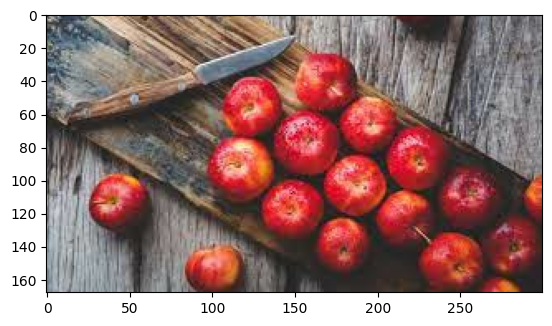

data/apple3.jpg


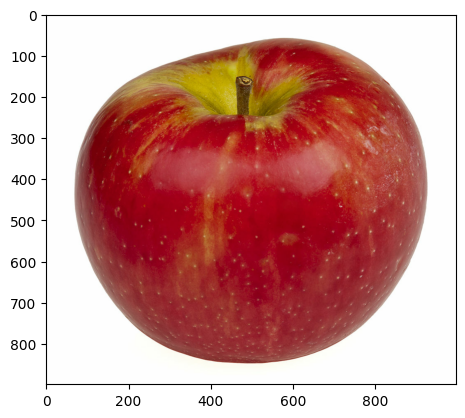

data/orange2.jpg


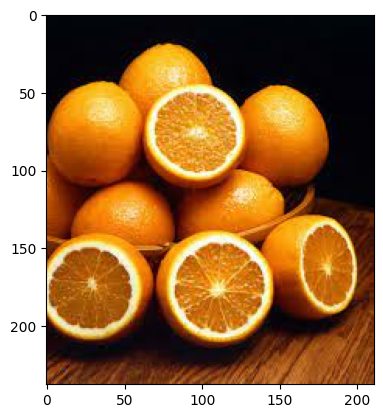

data/apple.jpg


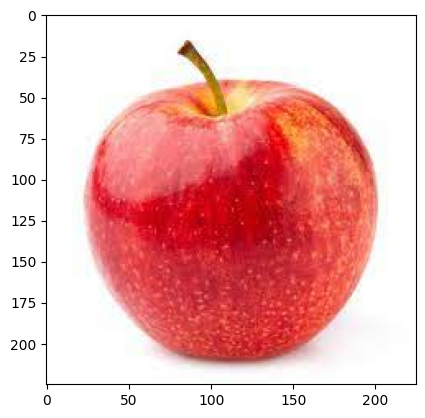

data/orange.jpg


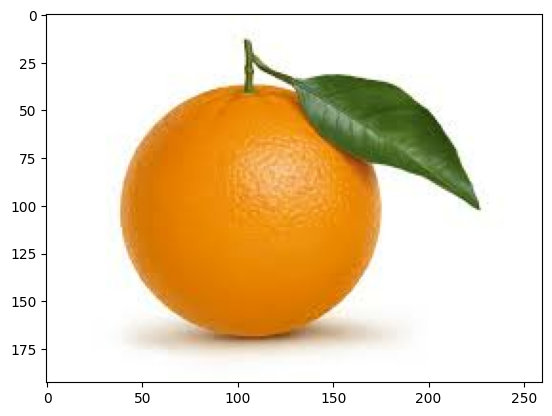

In [42]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import glob

from PIL import Image

# Converting the values into features
# _int64 is used for numeric values

def _int64_feature(value):
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

# _bytes is used for string/char values

def _bytes_feature(value):
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

tfrecord_filename = 'something.tfrecords'

# Initiating the writer and creating the tfrecords file.

writer = tf.io.TFRecordWriter(tfrecord_filename)

# Loading the location of all files - image dataset
# Considering our image dataset has apple or orange
# The images are named as apple01.jpg, apple02.jpg .. , orange01.jpg .. etc.

images = glob.glob('data/*.jpg')

for image in images:
  print(image)
  f=open(image,'rb')
  img=f.read()

  #just to show image
  img2=tf.image.decode_jpeg(img)
  img2=img2.numpy()
  plt.imshow(img2)
  plt.show()

  label = 0 if 'apple' in image else 1
  feature = { 'label': _int64_feature(label),
              #'image': _bytes_feature(img.tostring()) }
              'image': _bytes_feature(img) }

# Create an example protocol buffer

  example = tf.train.Example(features=tf.train.Features(feature=feature))

# Writing the serialized example.

  writer.write(example.SerializeToString())

writer.close()

# To read from TFRecord

Use tf.image.decode_jpeg to convert bytes to tensor and subsequently to numpy array if required

['something.tfrecords']


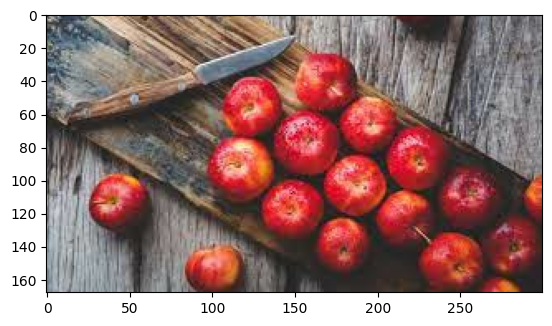

tf.Tensor(0, shape=(), dtype=int64)


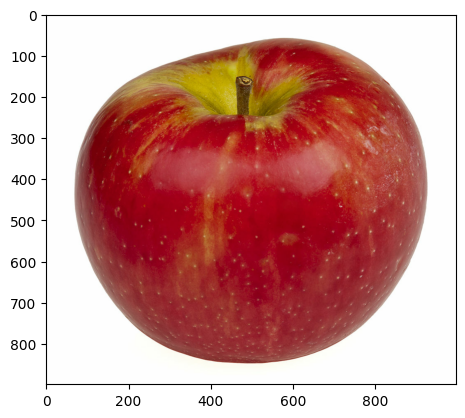

tf.Tensor(0, shape=(), dtype=int64)


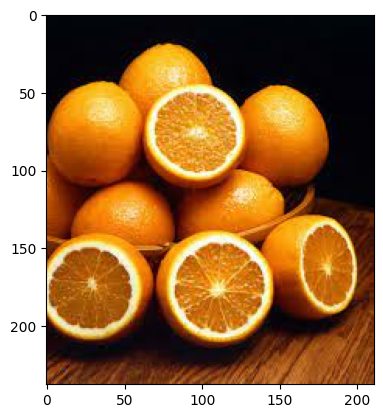

tf.Tensor(1, shape=(), dtype=int64)


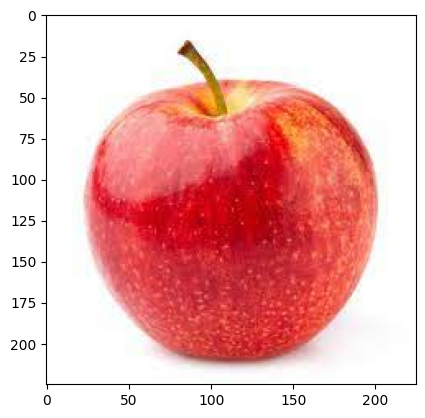

tf.Tensor(0, shape=(), dtype=int64)


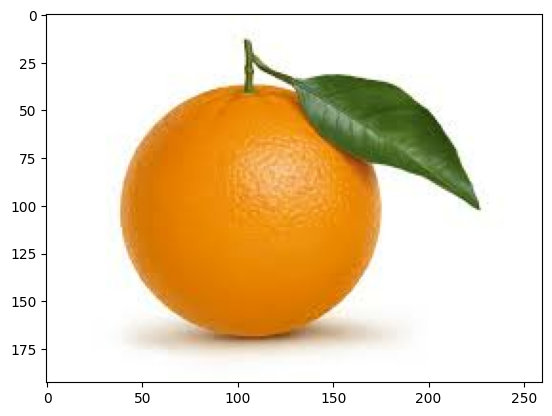

tf.Tensor(1, shape=(), dtype=int64)


In [44]:
import tensorflow as tf
import glob
import io
import IPython.display as display

filenames = glob.glob('*.tfrecords')
print(filenames)

feature_set = { 'image': tf.io.FixedLenFeature([], tf.string),
               'label': tf.io.FixedLenFeature([], tf.int64)
           }

for serialized_example in tf.data.TFRecordDataset(filenames):
  parsed_example = tf.io.parse_single_example(serialized_example, feature_set)
  label = parsed_example['label']
  image = parsed_example['image']

  img2=tf.image.decode_jpeg(image)
  img2=img2.numpy()

  plt.imshow(img2)
  plt.show()
  print(label)